In [1]:
import numpy as np
import conda
from PIL import Image
import math
import matplotlib.pyplot as plt

(256, 256)
[[ 47  47  48 ...  85  90  99]
 [ 47  47  48 ...  98  90  86]
 [ 48  48  49 ... 112  98  88]
 ...
 [ 99 118 130 ... 191 196 217]
 [ 67  79  92 ... 188 205 190]
 [ 41  48  61 ... 164 186 186]]


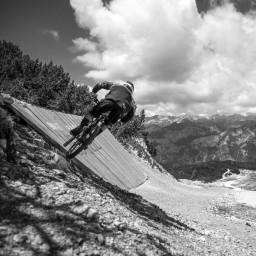

In [2]:
img = Image.open('21.jpg')
print(img.size)
X = np.array(img)
print(X)
img

In [3]:
#function for calcualting eigen values and eigen vectors
def eig(S):
    #calculate the eigen values and eigen vectors
    eigval, eigvec = np.linalg.eig(S) 
    
    #sorting them in decrasing order
    sortedeig  = np.argsort(-eigval)
    eigval = eigval[sortedeig]
    eigvec = eigvec[:, sortedeig]

    return (eigval, eigvec)

In [4]:
egval, egvec = eig(X)

In [5]:
#initialising some variables
x =[]
n = np.arange(1,257)
for K in n:
    V = np.diag(egval[range(K)])  #taking first K eigenvalues and diagonalising
    eginv = np.linalg.inv(egvec)  #inverting eignevector matrix
    U = egvec[:, range(K)]        #taking the corresponding K eignevectors 
    Uinv = eginv[range(K), :]     #taking inverted K eigenvectors
    A = np.real(U@V@Uinv)         #reconstructed matrix
    diff = X - A
    diffT = np.transpose(diff)
    prod = diff@diffT
    norm = np.array(math.sqrt(prod.trace())) #Frobenius norm of A, B = sqrt(trace((A-B)*(A-B)')) where ' is conjugate transpose
    x = np.append(x, norm)

In [6]:
#shows how the reconstructed and error images vary  with t
N = np.array([10, 50, 100, 150, 200, 250, 255])
for t in N:
    V = np.diag(egval[range(t)])  
    eginv = np.linalg.inv(egvec)
    U = egvec[:, range(t)]
    Uinv = eginv[range(t), :]
    A = np.real(U@V@Uinv) 
    re = Image.fromarray(A) #reconstructed image
    re = re.convert("L")
    er = Image.fromarray(X-A) #error image
    er = er.convert("L")
    re.show(), er.show()

Text(0.5, 1.0, 'EVD relationship')

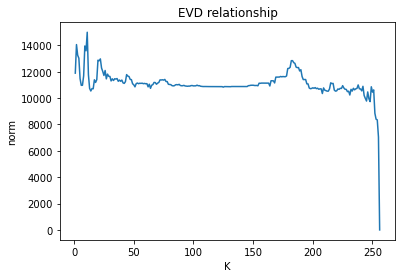

In [7]:
n.shape
plt.plot(n,x)
plt.xlabel('K')
plt.ylabel('norm')
plt.title('EVD relationship')

In [8]:
help(np.append)

Help on function append in module numpy:

append(arr, values, axis=None)
    Append values to the end of an array.
    
    Parameters
    ----------
    arr : array_like
        Values are appended to a copy of this array.
    values : array_like
        These values are appended to a copy of `arr`.  It must be of the
        correct shape (the same shape as `arr`, excluding `axis`).  If
        `axis` is not specified, `values` can be any shape and will be
        flattened before use.
    axis : int, optional
        The axis along which `values` are appended.  If `axis` is not
        given, both `arr` and `values` are flattened before use.
    
    Returns
    -------
    append : ndarray
        A copy of `arr` with `values` appended to `axis`.  Note that
        `append` does not occur in-place: a new array is allocated and
        filled.  If `axis` is None, `out` is a flattened array.
    
    See Also
    --------
    insert : Insert elements into an array.
    delete : Delet